In [1]:
from distutils.sysconfig import get_python_lib
print(get_python_lib())

d:\conda\envs\layout\Lib\site-packages


In [2]:
import torch
import torchvision
import pytorch_lightning as pl

d:\conda\envs\layout\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Data Loader
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
#from pytorch_lightning.utilities.types import EVAL_DATALOADERS, TRAIN_DATALOADERS
import pytorch_lightning as pl
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.utils.data import random_split
import json
from CustomDataset import * 
import sys
sys.path.append('../')
from config import *
from file_helper import *
#from Horizon_and_SAM.Horizon import PE_helper
from  PE_helper import *

#from pytorch_lightning.callbacks import ModelCheckpoint , Callback
import warnings
warnings.filterwarnings('ignore')
from torch.utils.tensorboard import SummaryWriter

def collate_fn(batch):
    return tuple(zip(*batch))
#=================================
#             Augmentation
#=================================

def gauss_noise_tensor(img):
    rand = torch.rand(1)[0]
    if rand < 0.5 and Horizon_AUG:
        sigma = rand *0.125
        out = img + sigma * torch.randn_like(img)
        return out
    return img

def blank(img):    
    return img

class CustomDataModule(pl.LightningDataModule):
    def __init__(self ,
                 train_dir ,
                 test_dir , batch_size = 2,
                 num_workers = 0 , img_size=[IMG_WIDTH, IMG_HEIGHT] , use_aug = True ,padding_count = 24 ,c =0.1
                   ):
        super().__init__()
        self.train_dir = train_dir
        self.test_dir = test_dir
        
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.img_size = img_size      
        self.use_aug = use_aug
        self.padding_count  = padding_count
        self.c = c
        

        pass

    def prepare_data(self) -> None:
        # Download dataset
        pass

    def setup(self, stage):
        # Create dataset...          
                
        self.entire_dataset = CustomDataset(self.train_dir  , use_aug= self.use_aug , padding_count= self.padding_count , c=self.c , img_size=self.img_size)
        self.train_ds , self.val_ds = random_split(self.entire_dataset , [0.9, 0.1])        
        self.test_ds = CustomDataset(self.test_dir  , use_aug= False , img_size=self.img_size ,  padding_count= self.padding_count )
        
        print("image size ",self.img_size)
        pass

    # ToDo: Reture Dataloader...
    def train_dataloader(self) :
        return DataLoader(self.train_ds , batch_size= self.batch_size , num_workers= self.num_workers , shuffle=True)
    
    def val_dataloader(self) :
        return DataLoader(self.val_ds , batch_size= self.batch_size , num_workers= self.num_workers , shuffle=False)
    
    def test_dataloader(self):
        return DataLoader(self.test_ds , batch_size= self.batch_size , num_workers= self.num_workers , shuffle=True)

    pass


# Test
dm = CustomDataModule ( train_dir= f"../anno/test_visiable_10_no_cross.json" ,
                       test_dir= f"../anno/test_visiable_10_no_cross.json" , padding_count=256, img_size=[512,256]
                       )


d:\Projects\Layout\NTHU_CGV_Layout_exp\ours
d:\Projects\Layout\NTHU_CGV_Layout_exp\Horizon_and_SAM\Horizon
d:\Projects\Layout\NTHU_CGV_Layout_exp\Horizon_and_SAM\Horizon


In [4]:
import torch
import torchvision
print(torch.__version__)

1.13.1


In [5]:
#from pytorch_lightning import *
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
#from lightning.pytorch.callbacks import ModelCheckpoint

In [6]:
import numpy as np
a = np.log(0.2)
b = np.exp(1.6)
print(a)
print(b)

-1.6094379124341003
4.953032424395115


In [7]:
from torch import Tensor
def unpad_data( x :[Tensor] ) :
	non_zero_indices = torch.nonzero(x)
	#print(non_zero_indices)
	# Get the non-zero values
	non_zero_values = x[non_zero_indices[:,0], non_zero_indices[:,1]]

	unique = torch.unique(non_zero_indices[:,0] ,return_counts=True)	
	non_zero_values = torch.split(non_zero_values , tuple(unique[1]))
	
	return non_zero_values

Using 16bit None Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


image size  [1024, 512]



  | Name             | Type               | Params
--------------------------------------------------------
0 | pe               | PositionalEncoding | 0     
1 | encoder          | TransformerEncoder | 50.4 M
2 | pixel_value_proj | Conv2d             | 11.0 M
3 | mlp              | MLP                | 697 K 
4 | cls_head         | Linear             | 65    
5 | u_head           | Linear             | 130   
6 | v_head           | Linear             | 260   
--------------------------------------------------------
62.3 M    Trainable params
0         Non-trainable params
62.3 M    Total params
124.515   Total estimated model params size (MB)


Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s] 0 index tensor([], dtype=torch.int64) tensor([], size=(0, 2))
u_pad tensor([0.1533, 0.3270, 0.9335, 1.0746, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



u tensor([0.1533, 0.9335], device='cuda:0')
vtop tensor([0.3445, 0.3295], device='cuda:0')
vbtm tensor([0.7703, 0.7933], device='cuda:0')
du tensor([0.1737, 0.1412], device='cuda:0')
dvtop tensor([0.3311, 0.3302], device='cuda:0')


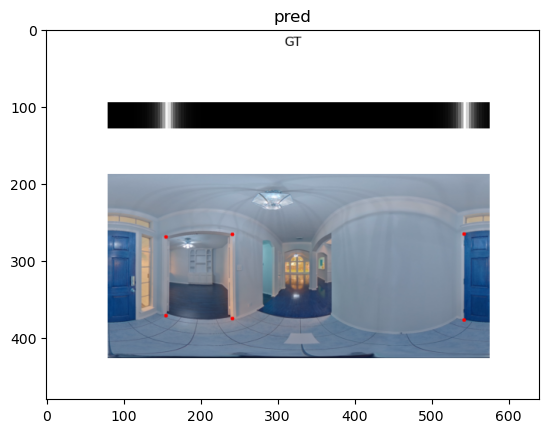

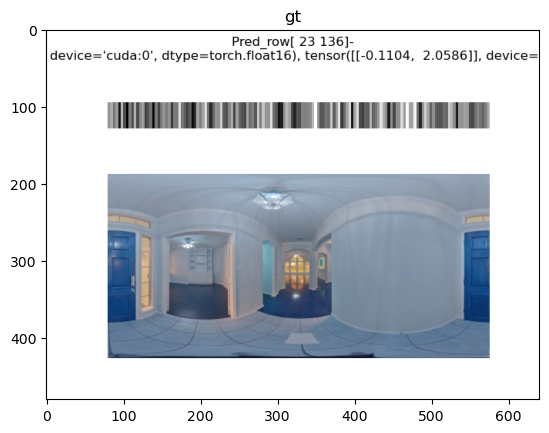

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



u tensor([1.0000e-04, 8.8969e-01], device='cuda:0')
vtop tensor([0.3627, 0.3941], device='cuda:0')
vbtm tensor([0.7080, 0.6632], device='cuda:0')
du tensor([0.1132, 0.0468], device='cuda:0')
dvtop tensor([0.3927, 0.4006], device='cuda:0')


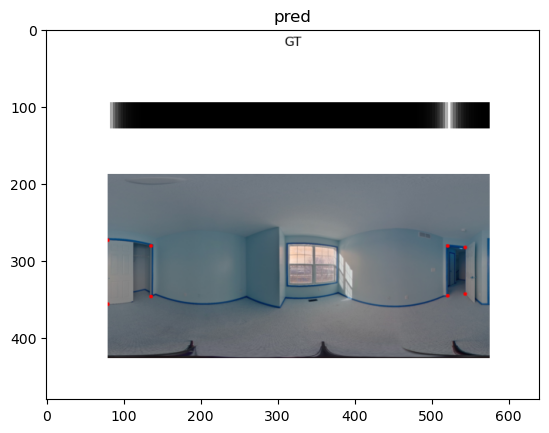

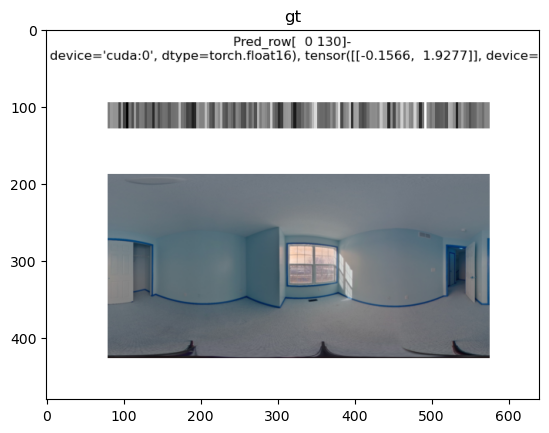

Epoch 0: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it, v_num=]

`Trainer.fit` stopped: `max_steps=1` reached.


Epoch 0: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it, v_num=]


You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


image size  [1024, 512]
Testing: 0it [00:00, ?it/s]0 index tensor([], dtype=torch.int64) tensor([], size=(0, 2))
u_pad tensor([0.2597, 0.3715, 0.4424, 0.5647, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Testing DataLoader 0: 100%|██████████| 1/1 [00:04<00:00,  4.52s/it]all_tp [0 1 1 1 1 1 1 0 0 1 1 0]
all_fp [1 0 0 0 0 0 0 1 1 0 0 1]
ap_0.05 0.4135031635031635
all_tp [0 0 0 0 0 0 0 0 0 0 0 0]
all_fp [1 1 1 1 1 1 1 1 1 1 1 1]
ap_0.5 0
all_tp [0 0 0 0 0 0 0 0 0 0 0 0]
all_fp [1 1 1 1 1 1 1 1 1 1 1 1]
ap_0.75 0
all_iou 1.0574902818944227
mIOU 0.08134540629957097


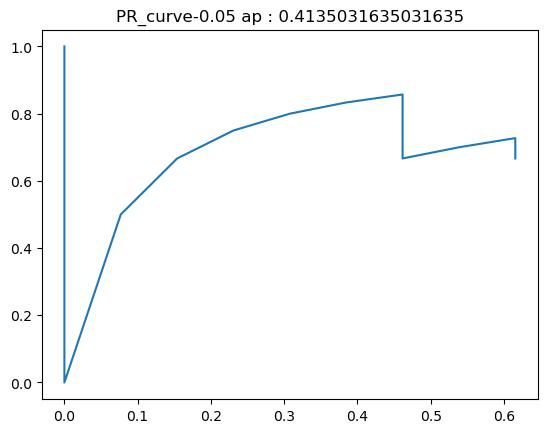

all_iou 1.0574902818944227
mIOU 0.08134540629957097


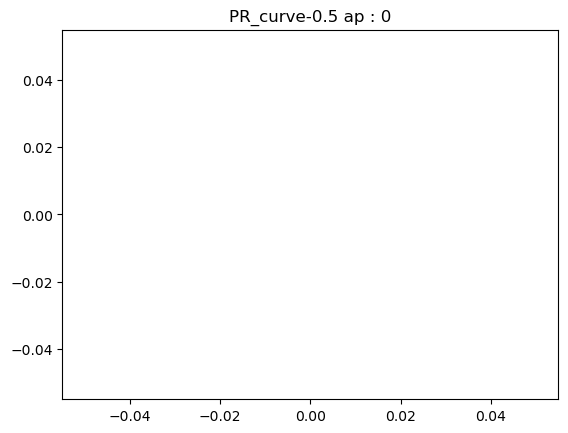

all_iou 1.0574902818944227
mIOU 0.08134540629957097


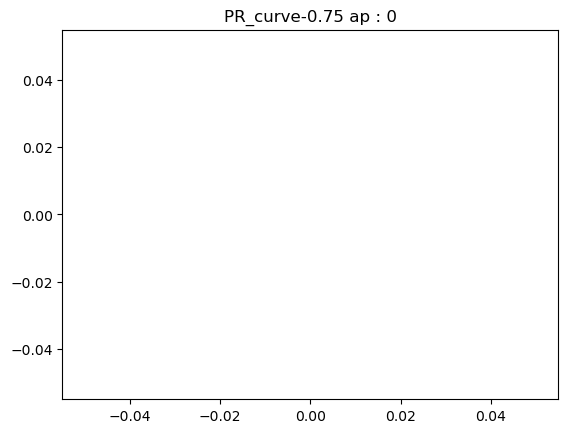

Testing DataLoader 0: 100%|██████████| 1/1 [00:05<00:00,  5.12s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Eval/AUC_0.05         0.4135031635031635
      Eval/AUC_0.5                  0.0
      Eval/AUC_0.75                 0.0
Eval/Precision_rate_0.05    0.6666666666666666
 Eval/Precision_rate_0.5            0.0
Eval/Precision_rate_0.75            0.0
  Eval/Recall_rate_0.05     0.6153846153846154
  Eval/Recall_rate_0.5              0.0
  Eval/Recall_rate_0.75             0.0
        Eval/mIou           0.08134540629957097
      test_cls_loss         0.5723152756690979
  test_decoded_MAE_loss     1.0820698738098145
      test_l1_loss          2.8808493614196777
     test_total_loss        12.013916969299316
─────────────────────────────

In [15]:
import torch
from torch import nn
from torch.nn import functional as F
from typing import Any
import pytorch_lightning as pl
from config import *
import torchvision.models as models
from torchvision.ops import MLP
import math
from torch import Tensor
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from VerticalCompressionNet import * 
from CustomTransformer import *

def encode_target(box_b , base_u):
    '''
    box_b[:, 1] = (0.5 -box_b[:, 1])  # v top
    box_b[:, 2] = (box_b[:, 2] -0.5) # v btm
    #box_b[:, 3] = ( box_b[:, 3] + base_u) # du
    box_b[:, 3] = box_b[:, 3] # du

    box_b[:, 4] = (0.5 -box_b[:, 4])  # v top
    box_b[:, 5] = (box_b[:, 5] -0.5) # v btm
    box_b[:, 0] = (base_u - box_b[:, 0])  # u
    '''
    
    box_b[:, 1] = torch.log(torch.abs(0.5 -box_b[:, 1]))  # v top
    box_b[:, 2] = torch.log(torch.abs(box_b[:, 2] -0.5)) # v btm
    box_b[:, 3] = torch.log(torch.abs(box_b[:, 3])) # du

    box_b[:, 4] = torch.log(torch.abs(0.5 -box_b[:, 4]))  # v top
    box_b[:, 5] = torch.log(torch.abs(box_b[:, 5] -0.5)) # v btm
    box_b[:, 0] = torch.log(torch.abs( base_u - box_b[:, 0]  ))  # u

    return box_b
def decode_target(box_b , base_u):    
    '''
    box_b[:, 0] = base_u - box_b[:, 0]  # u
    box_b[:, 1] = 0.5 - box_b[:, 1]  # v top
    box_b[:, 2] = box_b[:, 2] +0.5 # v btm
    box_b[:, 3] = base_u + box_b[:, 3]  # du

    box_b[:, 4] = 0.5 -box_b[:, 4]  # v top    
    box_b[:, 5] = box_b[:, 5] +0.5 # v btm
    '''
    
    box_b[:, 0] = base_u - torch.exp( box_b[:, 0] )  # u
    box_b[:, 1] = 0.5 - torch.exp(box_b[:, 1])  # v top
    box_b[:, 2] = torch.exp(box_b[:, 2]) +0.5 # v btm
    box_b[:, 3] = torch.exp(box_b[:, 3]) + base_u  # du

    box_b[:, 4] = 0.5 - torch.exp(box_b[:, 4])  # v top    
    box_b[:, 5] = torch.exp(box_b[:, 5]) +0.5 # v btm
    return box_b

def cornersToxyxy( corners_b ):
    # Input
    #   corners_b : shape [b , n , 6 ] , format uvvuvv
    # Output
    #   shape [b , n , 4 ] , format xyxy
    b , n = corners_b.shape[:2]
    results = torch.zeros((b, n , 4) ,device= corners_b.device)
    results[:,:, 0] = corners_b[:, :, 0 ]
    results[:,:, 1] = torch.min(corners_b[:, :, 1 ] , corners_b[:, :, 4 ]  )
    results[:,:, 2] = corners_b[:, :, 3 ]
    results[:,:, 3] = torch.min(corners_b[:, :, 2 ] , corners_b[:, :, 5 ]  )

    return results
    pass

def visualized_mask(img_b , pred_mask_b , gt_mask_b):
    result_b = []
    for img , pm_b , gm_b in zip(img_b , pred_mask_b , gt_mask_b):
        _img = img.permute(1,2,0).detach().cpu().numpy()
        h,w = _img.shape[:2]

        combined =_img.copy()         
        # visualize by mask 
        #   green = gt , red = prediction
        for pm in pm_b:
            scaled_pm = cv2.resize(pm , (w,h) , interpolation = cv2.INTER_CUBIC)
            combined = combined + (1,0,0)*scaled_pm 
        for gm in gm_b:
            scaled_gm = cv2.resize(gm , (w,h) , interpolation = cv2.INTER_CUBIC)        
            combined = combined +  (0,1,0)*scaled_gm

        #plt.imshow(combined)
        #plt.show()
        result_b.append(combined)
    return result_b
    pass

class PositionalEncoding(nn.Module):
    def __init__(self, d_model: 256, dropout: float = 0.1, max_len: int = 1024):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        r"""Inputs of forward function
        Args:
            x: the sequence fed to the positional encoder model (required).
        Shape:
            x: [sequence length, batch size, embed dim]
            output: [sequence length, batch size, embed dim]
        Examples:
            >>> output = pos_encoder(x)
        """
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)


class TransformerModel(nn.Module):
    def __init__(self, d_model: 256, nhead: int , d_hid: int, nlayers: int, dropout: float = 0.1 , activation="relu" ,
                  normalize_before=False , out_dim=20 ,channel = 1024):
        super().__init__()
        #self.ntoken = ntoken
        self.model_type = 'Transformer'
        self.d_model = d_model
        self.out_dim =out_dim
       
        self.enc_proj = nn.Linear(channel , self.out_dim * 4)
        
        self.cls_head = nn.Linear(channel, 1 )
        self.u_head = nn.Linear(channel, 2 )
        self.v_head = nn.Linear(channel, 4 )

        self.u_head.bias.data.fill_(self.out_dim /100*0.5)
        self.v_head.bias.data.fill_(0.15)

        
    
        
    def forward(self, src: Tensor ) -> Tensor:
        # permute to (Sequence_length , Batches , Hidden layer)
        '''
        plt.imshow(src[0].detach().cpu().numpy())
        plt.title("src")
        plt.show()
        '''
        src         = src.permute(2,0,1)   #  [w, b, c*h]  , example: [256 , 5 , 1024]        
        #src         = src.permute(1 , 0 , 2)# torch.Size([1024, b, 256])        
        batch_size  = src.shape[1]   
        '''
        src_pe         = self.pe(src)   # [ 256 , b , hidden_dim]
        #print("src_pe",src_pe.shape)
        src_pe         = self.encoder(src_pe) # [ 256 , b , hidden_dim]
        '''     
        src_pe         = self.enc_proj(src) # [ 256 , b , max count * 4
        src_pe         = src_pe.view(src_pe.shape[0], src_pe.shape[1], self.out_dim , 4) # [ 256 , b , max count * 4
        #src_pe         = src_pe.permute(1,0,2)  # [b , width , 1024]
        out = src_pe.permute(1 , 2 , 0, 3)  # [b, max_count , seq_len, step_cols]
        out = out.contiguous().view(out.shape[0] , self.out_dim , -1) 

        #print(src_pe.shape)
        #plt.imshow(src_pe[0].detach().cpu().numpy())
        #plt.title("encoder output")
        #plt.show()
        #print("self.query_embed.weight " , self.query_embed.weight .shape)
        #out = self.decoder( self.query_embed.weight , src_pe)
        '''
        out = self.decoder1(src_pe)        
        out = torch.relu(out)
        out = self.decoder2(out)        
        out = torch.relu(out)
        out = self.decoder3(out)        
        out = torch.relu(out)
        '''
        #print("out",src_pe.shape)        
       
        box_u_logits = self.u_head(out)
        box_v_logits = self.v_head(out)
        cls_logits = self.cls_head(out)
        
        #print("box_v_logits" , box_v_logits.shape)
        box_logits = torch.cat([ box_u_logits[:,:,0].unsqueeze(2) ,
                                 box_v_logits[:,:,0].unsqueeze(2) ,
                                 box_v_logits[:,:,1].unsqueeze(2) , 
                                 box_u_logits[:,:,1].unsqueeze(2) ,
                                 box_v_logits[:,:,2].unsqueeze(2) ,
                                 box_v_logits[:,:,3].unsqueeze(2)] , dim=-1 )
        #print("box_logits" , box_logits.shape)
        return box_logits ,cls_logits


class VerticalQueryTransformer(pl.LightningModule):    
    def __init__(self  ,  max_predict_count = 24 ,
                    hidden_out = 128 , class_num = 1 ,
                    log_folder = "__test" , num_classes = 1 , 
                    backbone_trainable =False, load_weight =""  ,
                    dropout = 0.01 , normalize_before=False
                    ,stride = 3,
                    img_size = [1024,512]
                    ):
        #print(" input_size" ,  input_size)
        super().__init__()
        self.confidence_threshold = 0.2
        self.nms_threshold = 0.5
        self.log_folder = create_folder(os.path.join(os.getcwd() , "output" , log_folder))
        self.automatic_optimization = False
        self.hidden_size = hidden_out
        self.max_predict_count = max_predict_count
        self.num_classes  = num_classes 

        self.input_width = img_size[0]
        self.input_height = img_size[1]
        self.stride=stride
        self.patch_out =  self.input_width//self.stride
        #print("self.patch_out" , self.patch_out)
        
        

        #self.pixel_value_proj = nn.Linear( 3*self.input_height , self.hidden_size )

        self.pe = PositionalEncoding(self.hidden_size ,dropout , max_len=  self.input_width)
        '''
        encoder_norm = nn.LayerNorm(self.hidden_size) if normalize_before else None
        encoder_layer = TransformerEncoderLayer(self.hidden_size, 8, 2048,
                                                dropout, 'relu', normalize_before)
        self.encoder = TransformerEncoder(encoder_layer, 8, encoder_norm )
        '''
        encoder_layer = nn.TransformerEncoderLayer(d_model=self.hidden_size, nhead=8, dropout=dropout, activation='relu', batch_first=True, norm_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)

        #decoder_layer = nn.TransformerDecoderLayer(d_model=self.hidden_size, nhead=8  )
        #self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)


        #self.backbone = Resnet()

        #self.pos_emb = nn.Embedding(self.max_predict_count , self.hidden_size)
        self.pos_emb = nn.Parameter(torch.randn(size=(1,  self.patch_out, hidden_out)), requires_grad=True)
        
        self.pixel_value_proj =nn.Conv2d(
                in_channels= 3 ,
                out_channels=hidden_out,
                kernel_size= (self.input_height , stride),
                stride= (self.input_height , stride),
            )
        self.mlp = MLP(hidden_out , [hidden_out//2 , hidden_out//4 ,hidden_out//8 , hidden_out//16 ])

        self.cls_head = nn.Linear(self.hidden_size//16 , 1 )
        self.u_head = nn.Linear(self.hidden_size//16, 2 )
        self.v_head = nn.Linear(self.hidden_size//16, 4 )

        self.u_head.bias.data.fill_(1 /self.patch_out*0.5)
        self.v_head.bias.data.fill_(0.25)
    def reset_eval_helper(self ):        
        self.eval_helper = PR_Eval_Helper()
        pass
    def forward(self ,x ):
        #x = self.backbone(x)[-1] 
        #x = x.permute(0,3,1,2)  # [ batch , width , channel , height]
        #x = x.view(x.shape[0] , x.shape[1] , -1)  # [ batch , width , channel * height]        
        
        pixel_feat = self.pixel_value_proj(x)  # [ batch , hidden , height(=1) , patches ]
        pixel_feat = pixel_feat.flatten(2).permute(0,2,1)   # [ batch , patches ,hidden ]
        
        src_pe =  pixel_feat + self.pos_emb  # [ batch , patches ,hidden ]
        src_pe =  self.pe(src_pe)
        
        enc_out = self.encoder(src_pe)     
        #enc_out , weight = self.encoder(src_pe , return_weight= True )             
        
        enc_out = self.mlp(enc_out)
        box_u_logits = self.u_head(enc_out)
        box_v_logits = self.v_head(enc_out)
        cls_logits = self.cls_head(enc_out)
        
        box_logits = torch.cat([ box_u_logits[:,:,0].unsqueeze(2) ,
                                 box_v_logits[:,:,0].unsqueeze(2) ,
                                 box_v_logits[:,:,1].unsqueeze(2) , 
                                 box_u_logits[:,:,1].unsqueeze(2) ,
                                 box_v_logits[:,:,2].unsqueeze(2) ,
                                 box_v_logits[:,:,3].unsqueeze(2)] , dim=-1 )
        
        return box_logits ,cls_logits            

        return out_box , out_cls
    
    @torch.no_grad()
    def __calculate_pixel_PR_curve(self , pred_b , gt_input ):

        gt_u_b = unpad_data( gt_input['u'])          
        gt_vtop_b =unpad_data(gt_input['v_top'])
        gt_vbtm_b = unpad_data (gt_input['v_btm'])
        gt_du_b = unpad_data(gt_input['du'])
        gt_dvtop_b = unpad_data(gt_input['dv_top'])
        gt_dv_btm_b = unpad_data(gt_input['dv_btm'])

        EVAL_PIXEL_MASK_WIDTH = 2048
        EVAL_PIXEL_MASK_HEIGHT = 1024

        #print("pred" , pred_b)
        #print("gt u" , gt_u_b)
        batch_size = len(gt_u_b)
        
        # Calculate IoU based on pixel level mask
                

        pred_masks_b = []
        gt_masks_b = []
        for _batch_cnt in range(batch_size):
            pred_masks = []
            gt_masks = []

            pred = pred_b[_batch_cnt] if len(pred_b) >0 else []
            for p in pred:
                
                p = p.detach().cpu().numpy()
                pred_u =  p[[0,3]].reshape(-1,2)
                pred_vt = p[[1,4]].reshape(-1,2)
                pred_vb = p[[2,5]].reshape(-1,2) 
                

                polys , pred_mask = to_distorted_box(pred_u,pred_vt,pred_vb , return_mask= True ,
                                                h =EVAL_PIXEL_MASK_HEIGHT ,
                                                w = EVAL_PIXEL_MASK_WIDTH , 
                                                seg_count=30 , show_plt=False)
                pred_masks.append(pred_mask)
                #plt.imshow(pred_mask)
                #plt.title("Pred")
                #plt.show()

            u,vtop,vbtm,du,dvtop, dvbtm  = (gt_u_b[_batch_cnt] , gt_vtop_b[_batch_cnt] , gt_vbtm_b[_batch_cnt] , gt_du_b[_batch_cnt] ,
                                             gt_dvtop_b[_batch_cnt] , gt_dv_btm_b[_batch_cnt]  )
            gt_box =  torch.vstack([ u, vtop,vbtm, u + du ,dvtop , dvbtm]).permute(1,0)   # [n , 6]        
            
            
            for box in gt_box:
            
                box = box.detach().cpu().numpy()
                gt_u =  box[[0,3]].reshape(-1,2)
                gt_vt = box[[1,4]].reshape(-1,2)
                gt_vb = box[[2,5]].reshape(-1,2) 
                polys , gt_mask = to_distorted_box(gt_u,gt_vt,gt_vb , return_mask= True ,
                                                h =EVAL_PIXEL_MASK_HEIGHT ,
                                                w = EVAL_PIXEL_MASK_WIDTH , 
                                                seg_count=30 , show_plt=False)
                gt_masks.append(gt_mask)
                #plt.imshow(gt_mask)
                #plt.title("gt_mask")
                #plt.show()

            self.eval_helper.eval_batch_pr(pred_masks ,gt_masks  )

            pred_masks_b.append(pred_masks)
            gt_masks_b.append(gt_masks)
        return pred_masks_b , gt_masks_b

        pass
    
    @torch.no_grad()
    def __calculate_pr(self):
        assert self.eval_helper is not None , "eval_helper not reset"
        self.eval_helper.get_all_pr(self)

        self.eval_helper = None
        pass
    @torch.no_grad()
    def inf(self , imgs ):
        out_box , out_cls   = self.forward(imgs)  # [ batch , top_k , 5]   , [ batch , top_k , 1]                         
        decoded_pred_outputs =[]                
        batch_size = out_box.shape[0]
        
        # ========================================
        #                 Debug
        # ========================================
        '''
        #each batch
        for img , pred , pcls in zip(imgs, out_box , out_cls.view(batch_size,-1)):
            
            u_id = torch.argwhere(torch.sigmoid(pcls) > self.confidence_threshold)
            if(u_id.numel() ==0):
                continue
            u_id = u_id.view(-1)                        

            pred = pred[u_id]
            u_grad = (torch.arange(self.patch_out,device=pred.device).unsqueeze(-1) /self.patch_out ).view(-1)[u_id]
            
            save_folder = create_folder( os.path.join(self.log_folder ,"val"))
            save_path = os.path.join(save_folder, f"val_ep_{self.current_epoch}-{self.global_step}" )

            decode_pred = decode_target(pred.clone() , u_grad )
            decoded_pred_outputs.append(decode_pred)
    
            pred_us , pred_tops , pred_btms = self.pack_visualize(decode_pred[:,0], decode_pred[:,1],decode_pred[:,2],decode_pred[:,3]-decode_pred[:,0] ,decode_pred[:,4],decode_pred[:,5] )                    
            vis_imgs = visualize_2d_single(pred_us , pred_tops , pred_btms , u_grad = F.sigmoid(pcls).view(1 , -1 ) , imgs=  img , title="Pred" , save_path= save_path  )
            
            #plt.imshow(vis_imgs)
            #plt.title("raw inference")
            #plt.show()
        '''
        return out_box , out_cls 

    @torch.no_grad()
    def post_process(self , out_box , out_cls , imgs):
        decoded_pred_outputs =[]        
        score_outputs =[]        
        pp_imgs=[]
        batch_size = out_box.shape[0]

        # ToDo: Add NMS

        #each batch
        for img , pred , pcls in zip(imgs, out_box , out_cls.view(batch_size,-1)):
            
            scores = torch.sigmoid(pcls)
            u_id = torch.argwhere(scores > self.confidence_threshold)            
            if(u_id.numel() ==0):
                continue
            u_id = u_id.view(-1)            
                        
            pred = pred[u_id]
            u_grad = (torch.arange(self.patch_out,device=pred.device).unsqueeze(-1) /self.patch_out ).view(-1)[u_id]
            
            save_folder = create_folder( os.path.join(self.log_folder ,"pp"))
            save_path = os.path.join(save_folder, f"val_ep_{self.current_epoch}-{self.global_step}" )

            decode_pred = decode_target(pred.clone() , u_grad )

            # PP Filter
            print("before nms" , decode_pred.shape)
            # [Filter out impossiable door]
            keep_idx = decode_pred[:,0]< decode_pred[:,3]
            decode_pred = decode_pred[keep_idx]
            scores = (scores[u_id])[keep_idx]

            # [NMS]
            xyxy_box = cornersToxyxy(decode_pred.unsqueeze(0))  # [n , 4]
            nms_idx = torchvision.ops.nms(xyxy_box[0] , scores , self.nms_threshold)
            decode_pred = decode_pred[nms_idx]
            print("after nms" , decode_pred.shape)
            
            # decode_pred : shape [b , topN , 6]
            # pcls : shape [b , topN , 1]            
            decoded_pred_outputs.append(decode_pred)
            score_outputs.append(scores)
            
            pred_us , pred_tops , pred_btms = self.pack_visualize(decode_pred[:,0], decode_pred[:,1],decode_pred[:,2],decode_pred[:,3]-decode_pred[:,0] ,decode_pred[:,4],decode_pred[:,5] )                    
            vis_imgs = visualize_2d_single(pred_us , pred_tops , pred_btms , u_grad = F.sigmoid(pcls).view(1 , -1 ) , imgs=  img , title="Pred" , save_path= save_path  )
            pp_imgs.append(vis_imgs)

            #plt.imshow(vis_imgs)
            #plt.title("inference")
            #plt.show()

        return  decoded_pred_outputs , score_outputs ,pp_imgs
        pass
        
    @torch.no_grad()
    def pack_visualize(self, gt_u_b , gt_vtop_b , gt_vbtm_b , gt_du_b , gt_dvtop_b , dv_btm_b ):
        
        if isinstance(gt_u_b, torch.Tensor):
            sizes = [t.numel() for t in gt_u_b]               
            us = gt_u_b.flatten().unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            us[1::2]+=gt_du_b.flatten()
            us = torch.split(us.view(-1,2) , sizes)

            tops = gt_vtop_b.flatten().unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            tops[1::2]=gt_dvtop_b.flatten()
            tops = torch.split(tops.view(-1,2) , sizes)

            btms = gt_vbtm_b.flatten().unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            btms[1::2]=dv_btm_b.flatten()
            btms = torch.split(btms.view(-1,2) , sizes)

        elif isinstance(gt_u_b, tuple) and all(isinstance(t, torch.Tensor) for t in gt_u_b):        
            sizes = [len(t) for t in gt_u_b]               
            us = torch.cat(gt_u_b).view(-1).unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            us[1::2]+=torch.cat(gt_du_b).view(-1)
            us = torch.split(us.view(-1,2) , sizes)

            tops = torch.cat(gt_vtop_b).view(-1).unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            tops[1::2]=torch.cat(gt_dvtop_b).view(-1)
            tops = torch.split(tops.view(-1,2) , sizes)

            btms = torch.cat(gt_vbtm_b).view(-1).unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            btms[1::2]=torch.cat(dv_btm_b).view(-1)
            btms = torch.split(btms.view(-1,2) , sizes)
        else:
            assert("Wrong Type.")
        
        return us , tops ,btms
        
    def __common_step( self ,batch_idx,input_b , out_box , out_cls , mode ="train"):        
        
        assert mode in ['train' , 'val' , 'test'] , "Mode have to be [train , val , test]"
        # remove padding , each batch have different length
        img = input_b['image']
        gt_u_b = unpad_data( input_b['u'])          
        gt_vtop_b =unpad_data(input_b['v_top'])
        gt_vbtm_b = unpad_data (input_b['v_btm'])
        gt_du_b = unpad_data(input_b['du'])
        gt_dvtop_b = unpad_data(input_b['dv_top'])
        gt_dv_btm_b = unpad_data(input_b['dv_btm'])
        
        total_loss = 0
        b_cnt = 0        
        
        for u,vtop,vbtm,du,dvtop, dvbtm , pred ,cls_b , gt_grad_cls  in zip(gt_u_b , gt_vtop_b , gt_vbtm_b , gt_du_b , gt_dvtop_b , gt_dv_btm_b , out_box , out_cls ,input_b['u_grad'] ):
            
            # match            
            print()
            print("u",u)            
            print("vtop",vtop)            
            print("vbtm",vbtm)            
            print("du",du)            
            print("dvtop",dvtop)            
            #print("pred",pred)            
            #print("cls_b",cls_b)            
            #print("gt_grad_cls",gt_grad_cls)            
            gt_box =  torch.vstack([ u, vtop,vbtm,  du ,dvtop , dvbtm]).permute(1,0)   # [n , 6]            
            # gt u to grad
            u_grad = (torch.arange(self.patch_out,device=u.device).unsqueeze(-1) /self.patch_out ).view(-1)            
            # decode prediction (turn u and v to offsets)
            decode_pred_b = decode_target(pred.clone() , u_grad)           
            
            # When training , use gt to guide. 
            # ---------- Cost Matrix ----------
            u_cost = torch.cdist( (torch.arange(self.patch_out,device=u.device).unsqueeze(-1) /self.patch_out ) , u.unsqueeze(-1) )                                    
            cls_cost = -torch.sigmoid(cls_b)            
            
            # !! TODO: Handle nan !!
            
            cost_matrix =  cls_cost + u_cost * 2            
            

            # Select by cost matrix
            cost_matrix = cost_matrix.detach().cpu().numpy()            
            row_idx  , col_idx = linear_sum_assignment(cost_matrix)    

            matched_u = torch.tensor( np.float32(row_idx)/self.patch_out,device=u.device)
            # encode gt box based on selected u
            encode_gt_b = encode_target(gt_box.clone()  , matched_u)
                        
            #gt_cls = torch.zeros(self.patch_out,device= cls_b.device )            
            #gt_cls[row_idx] = 1            
            
            # Loss 
            l1_loss = F.l1_loss(pred[row_idx] ,  encode_gt_b[col_idx])             
            cls_loss = F.binary_cross_entropy_with_logits(cls_b.view(-1), gt_grad_cls) 
                        
            total_loss += l1_loss + cls_loss*1.25      

            self.log(f"{mode}_decoded_MAE_loss" , F.l1_loss( decode_pred_b[row_idx] , gt_box[col_idx] ))
            self.log(f"{mode}_l1_loss" , l1_loss)
            self.log(f"{mode}_cls_loss" , cls_loss)
            self.log(f"{mode}_total_loss" , total_loss)

            #print (f"{mode}_decoded_MAE_loss" , F.l1_loss( decode_pred_b[row_idx] , gt_box[col_idx] ))
            #print (f"{mode}_total_loss" , total_loss)
            #print (f"{mode}_cls_loss" , cls_loss)
            #print (f"{mode}_l1_loss" , l1_loss)
                        
            with torch.no_grad():
                if self.current_epoch % 5 == 0  :                                
                #if self.current_epoch > 0 and self.current_epoch % 5 == 0  and batch_idx <5 :                
                    save_path =  os.path.join(self.log_folder , f"{mode}_gt_ep_{self.current_epoch}-{self.global_step}-{batch_idx}" )
                    
                    gt_us , gt_tops , gt_btms = self.pack_visualize(u.view(1 , -1 ) , vtop , vbtm , du , dvtop , dvbtm )                   

                    vis_imgs = visualize_2d_single(gt_us , gt_tops , gt_btms , u_grad =  gt_grad_cls.view(1 , -1 ), imgs= img[b_cnt] , title="GT",save_path=save_path )                
                    #plt.imshow(vis_imgs)          
                    #plt.title("pred")          
                    #plt.show()

                    decode_pred = decode_pred_b[row_idx]
                    
                    save_path =  os.path.join(self.log_folder , f"{mode}_pred_ep_{self.current_epoch}-{self.global_step}-{batch_idx}" )                    
                    pred_us , pred_tops , pred_btms = self.pack_visualize(decode_pred[:,0], decode_pred[:,1],decode_pred[:,2],
                                                                          decode_pred[:,3]-decode_pred[:,0] ,
                                                                          decode_pred[:,4],decode_pred[:,5] )                    
                    vis_imgs = visualize_2d_single(pred_us , pred_tops , pred_btms , u_grad = F.sigmoid(cls_b).view(1 , -1 ) , imgs=  img[b_cnt] ,
                                                    title=f"Pred_row{row_idx}-\n u:{pred_us}" , save_path= save_path  )
                    #plt.imshow(vis_imgs)          
                    #plt.title("gt")          
                    #plt.show()

            b_cnt+=1
        return total_loss

    def training_step(self , input_b ,batch_idx ):
        
        img = input_b['image']        
        out_box , out_cls   = self.forward(img)  # [ batch , top_k , 5]   , [ batch , top_k , 1] 
        batch_size = out_box.shape[0]
        total_loss = self.__common_step(batch_idx , input_b , out_box , out_cls , "train")        
        
        op1  = self.optimizers()
        op1.zero_grad()        
        self.manual_backward(total_loss / batch_size)
        op1.step()

        return total_loss / batch_size
        pass    

    def validation_step(self, input_b, batch_idx):
        #print("val!!!!!")
        img = input_b['image']
        
        #out_box , out_cls   = self.forward(img)  # [ batch , top_k , 5]   , [ batch , top_k , 1]         
        #if( self.current_epoch %5==0 and batch_idx % 10==0 and self.current_epoch>0 ):
            #self.inf(img)
        out_box , out_cls   = self.forward(img)  
        self. __common_step(batch_idx , input_b ,out_box, out_cls , "val" )
        return
        

    def configure_optimizers(self):
        opt = optim.Adam(self.parameters() , lr=0.000035)

        return [opt] , []
    
    def on_test_epoch_start(self):        
        self.reset_eval_helper()        

    def test_step(self , input_b , batch_idx):
        
        img = input_b['image']        
        
        #out_box , out_cls   = self.forward(img)  # [ batch , top_k , 5]   , [ batch , top_k , 1]         
        #if( self.current_epoch %5==0 and batch_idx % 10==0 and self.current_epoch>0 ):
            #self.inf(img)
        out_box , out_cls  = self.inf(img)   
        final_box , final_score , pp_imgs  = self.post_process(out_box , out_cls , img)        
        
        
        # ToDo: post process output
        # ToDo: visualize output

        self. __common_step(batch_idx , input_b ,out_box, out_cls , "test" )        
        pred_masks , gt_masks = self.__calculate_pixel_PR_curve(final_box  , input_b)
        result_b = visualized_mask(img , pred_masks , gt_masks )

        if(batch_idx < 20):
            for i , result in enumerate(result_b):
                save_path = create_folder( os.path.join ( os.getcwd(),"output" , "__test" ,f"ep_{self.current_epoch}","test_output_masked" ))
                save_file_path = os.path.join(save_path , f"output_{batch_idx}_{i}")
                plt.imshow(result)
                plt.savefig(save_file_path )
                plt.title(f"output_{i}")
                plt.close()
        
        return 0
    
    def on_test_epoch_end(self):
        self.__calculate_pr()

        pass

# Unit testing...
#save_path = create_folder( os.path.join(os.getcwd() , "output" , "checkpoints"))
#save_file = os.path.join(save_path , "detr_v1_d20_e50.pth")

img_size=[1024, 512] 
m = VerticalQueryTransformer(max_predict_count = 100 ,
                             hidden_out=1024 ,
                             img_size=img_size  ,
                             backbone_trainable=True ,
                             dropout=0.01 , 
                             stride=7
                             )
padding = img_size[0] // m.stride
# Test

from pytorch_lightning.loggers import TensorBoardLogger
logger = TensorBoardLogger('tb_logs2', name='2k')

#m = VerticalQueryTransformer(max_predict_count = 20 , hidden_out=256 , load_weight="D:/OneDrive/OneDrive - NTHU/Layout/Horizon/0912_all_bk.pth"  , backbone_trainable=True)

'''
save_path = create_folder( os.path.join(os.getcwd() , "output" , "checkpoints"))
save_file = os.path.join(save_path , "detr_v1_d20_e50.pth")
m = torch.load(save_file)
          

'''

save_path = create_folder( os.path.join(os.getcwd() , "output"  , "checkpoints"))
#save_file = os.path.join(save_path , "detr_v9_d20_e200_bugfix_pe_overfit.pth")
save_file = os.path.join(save_path , "ours_test")
#save_file = os.path.join(save_path , "detr_v9_d20_e200_bugfix_pe_customAtten.pth")
#m.load_state_dict(torch.load(save_file)['state_dict'])



checkpoint_callback = ModelCheckpoint(
    monitor='val_total_loss',  # The validation metric to monitor
    dirpath= save_path ,  # Directory where checkpoints will be saved
    filename="best-model-{epoch:02d}-{val_total_loss:.2f}",  # Checkpoint file name
    save_top_k=3,  # Save only the best model
    mode='min',  # 'min' for metrics where lower is better (like loss), 'max' for metrics where higher is better (like accuracy)
    save_last=True
)

loop_cnt = 1
trainer = pl.Trainer(accelerator='gpu' , devices=1 ,
                    min_epochs=1, max_epochs=20 , precision=16 , logger= logger , fast_dev_run=True  ,
                    callbacks=[checkpoint_callback ])
for i in range(loop_cnt):
    dm = CustomDataModule ( 
                            #train_dir= f"../anno/train_visiable_2000.json" ,
                            train_dir= f"../anno/debug_train_b.json" ,
                            #train_dir= f"../anno/train_visiable_10k.json" ,
                            #test_dir= f"../anno/test_visiable_200_no_cross.json" ,
                            test_dir= f"../anno/test_visiable_10_no_cross.json" ,
                            #test_dir= f"../anno/train_visiable_20_no_cross.json" ,
                            padding_count=padding , use_aug=False , c= 0.65,batch_size=6,
                            img_size=img_size
                        )
    trainer.fit(m , dm)
    trainer.test(m , dm)



In [ ]:
a = np.random.rand(10,5,3)
b = np.random.rand(50,20)
h,w = b.shape[:2]
a = cv2.resize(a , (w,h) , interpolation = cv2.INTER_AREA)
print(a.shape)

c = a + b[:,:,np.newaxis]
print(c.shape)

In [ ]:
#a = torch.rand(2,3,512,1024)
a = torch.rand(2,3,512)
c = MLP(512 , [512,256,128])
#c = nn.Conv2d(in_channels= 3, out_channels= 256 , kernel_size=(512,1) , stride=(512,1))

b = c(a)
print(b.shape)

In [ ]:
a = torch.rand(1,5,8)
self_attn = nn.MultiheadAttention(8, 8, dropout=0.1)
atten , src = self_attn(a  , a, a)

print(atten.shape) 	# ([20, 5, 256])
print(src.shape) 	# ([5, 20, 20])
plt.imshow(src[0].detach().cpu().numpy())
plt.show()

plt.imshow(atten.permute(1,0,2)[0].detach().cpu().numpy())
plt.show()

print(atten)
print(src)

In [ ]:
save_path = create_folder( os.path.join(os.getcwd() , "output" , "checkpoints"))
save_file = os.path.join(save_path , "detr_v9_d10k.pth")
#torch.save(m , save_file)
torch.save(m.state_dict(), save_file)

In [ ]:
#a = torch.rand(1,5,8)
a = torch.arange(80.0).view(2,5,8)
n = nn.Linear(8,2)
n.bias.data.fill_(1)
n.weight.data.fill_(1)

print(n.weight.shape)
print(n.bias)
b =n(a)
print(a)
print(b.shape)
print(b)

In [ ]:
a= torch.rand(20,2)
b = torch.rand(20)*2
b = b.to(torch.long).view(-1,1)
#c = a[b]
c= torch.gather(a,1,b)
print(c.shape)
print(a)
print(b)
print()
print(c)

In [ ]:
decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
memory = torch.rand(10, 32, 512)
tgt = torch.rand(20, 32, 512)
out = transformer_decoder(tgt, memory)
print(out.shape)

In [ ]:
import torch
horizon_path =r"D:/OneDrive/OneDrive - NTHU/Layout/Horizon/0912_all_bk.pth"
#models_dict = torch.load_s
checkpoint = torch.load(horizon_path ,  map_location="cpu")
print(checkpoint['state_dict'].keys())
#model.load_state_dict(checkpoint['model_state_dict'])
pretrained_dict = {k: v for k, v in checkpoint['state_dict'].items() if k in m.state_dict()}
m.load_state_dict(pretrained_dict , strict=False)

In [ ]:
a= torch.rand(2,256 ,1024)
b = nn.Conv1d(256 , 64 , kernel_size=3 ,padding=1)
c = b(a)
print(c.shape)


In [ ]:
a = torch.rand(2,5,2)
print(a)
b=  nn.MaxPool2d((5,1))
c = b(a)
print(c.shape)
print(c)

In [ ]:
a = torch.rand(200).view(2,100,1)
#aa = a[:,:,0].unsqueeze(0)
#print(aa.shape)
b = F.interpolate(a.view(2,-1).unsqueeze(0), 10 )[0]
print(b.shape)

In [ ]:
a = torch.rand(2,10,1)
b = torch.cat([a,a] , dim=1)
print(b.shape)

In [ ]:
#a = torch.rand(2,100,1)
a = torch.arange(400).view(2,100,2)
b = torch.arange(20).view(2,10)

print(a)
print(b)
b= b.unsqueeze(-1).repeat(1,1,2)
print(b)
#print("b unsqueeze",b.unsqueeze(-1))

c = a.gather(1, b)
print(c.shape)
print(c)


In [5]:
import torch
a  = torch.tensor([0.01,0,0.2,0]) . view(-1 , 4)
print(a)
b = torch.where(a==0)
print(b)
a[b] = 0.01
print(a)

tensor([[0.0100, 0.0000, 0.2000, 0.0000]])
(tensor([0, 0]), tensor([1, 3]))
tensor([[0.0100, 0.0100, 0.2000, 0.0100]])


In [ ]:
a=torch.arange(5)
b=torch.arange(5)
c=torch.arange(5)

d = torch.vstack([a,b,c]).permute(1,0)
print(d)


In [ ]:
from scipy.optimize import linear_sum_assignment
a = torch.tensor([ [0,1,2]  ,  [0,3,5] , [1,0,5] ]).to(torch.float32)
b = torch.tensor([ [0,1,2] , [1,0,5] ]).to(torch.float32)

cost = torch.cdist(b,a)
print(cost)
row , col = linear_sum_assignment(cost,)
print(row)
print(col)

In [ ]:
x = torch.tensor([[0.7605, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7730, 0.5752, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7057, 0.5861, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8386, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8304, 0.7823, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7034, 0.5994, 0.5691, 0.5652, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6996, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8305, 0.7819, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8238, 0.7839, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
# Get the indices of non-zero elements
non_zero_indices = torch.nonzero(x)
print(non_zero_indices)
# Get the non-zero values
non_zero_values = x[non_zero_indices[:,0], non_zero_indices[:,1]]

unique = torch.unique(non_zero_indices[:,0] ,return_counts=True)
print("unique" , unique)
# Print the result
print(non_zero_values)
non_zero_values = torch.split(non_zero_values , tuple(unique[1]))
print("split non_zero_values" , non_zero_values)

def unpad_data( x :[Tensor] ) :
	non_zero_indices = torch.nonzero(x)
	print(non_zero_indices)
	# Get the non-zero values
	non_zero_values = x[non_zero_indices[:,0], non_zero_indices[:,1]]

	unique = torch.unique(non_zero_indices[:,0] ,return_counts=True)
	print("unique" , unique)
	# Print the result
	print(non_zero_values)
	non_zero_values = torch.split(non_zero_values , tuple(unique[1]))
	print("split non_zero_values" , non_zero_values)
	return non_zero_values

In [ ]:
a = torch.tensor([[0.58 , 0.6] , [0.4] ] , )
b = torch.tensor([0.1 , 0.2] , )

c = a.repeat(2)
print(a.repeat(2))

In [ ]:
transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
src = torch.rand((10, 32, 512))
tgt = torch.rand((20, 32, 512))
out = transformer_model(src, tgt)

print(out.shape)

In [ ]:
import torch

print(torch.rand(1)[0])